# SUMMA Modelling Analysis 

# Import everything

In [1]:
# import packages 
%matplotlib widget

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

# interactive plotting
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots # adding for subplots
import plotly.figure_factory as ff

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import csv 
import copy 
import os.path 

In [2]:
import seaborn as sns # a module that adds some plotting capabilities and makes your plots look better
import matplotlib as mpl
sns.set() # activates some of the default settings from seaborn
# The following settings just set some defaults for the plots
plt.rcParams['figure.figsize']  = (12,4) #width, height
plt.rcParams['axes.titlesize']  = 14
plt.rcParams['axes.labelsize']  = 12
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['legend.fontsize'] = 11
mpl.rcParams['figure.dpi'] = 100

sns.set_style("dark", {"xtick.bottom": True, 'ytick.left': True})

In [3]:
## Define some plotting constants for easier coding 
plt.close('all')

# Modeling colors
colormet = 'black'
colormelt = 'darkgreen'
colorexpp = 'royalblue'
colorwind = 'indianred'

# Colors
colornosnow='lightgrey' # the plotly no snow color so that it is lightly and not dominate in the plot 
colorsnow = '#7dcfd4' # slightly desaturated cyan
colorsnowunload = '#1F15D5' # bright, deep blue 
colorsunny = '#E4E44A' # trying a little less bright 

# Grouped Colors
colors = [colorsnow, colorsnowunload] # my colors 

# Names
namesnow = 'Snow Staying'
namesnowunload = 'Snow Unloading'
group_labels = ['Snow Staying', 'Snow Unloading']

nametemp = "Air Temperature (C)"
nameSW = "Shortwave (W/m2)"
namewind = "Wind Speed (m/s)"
nameSWE = 'SWE in the Canopy (mm)'

nametempbreak = "Air Temperature <br> (C)"
nameSWbreak = "Shortwave <br>(W/m2)"
namewindbreak = "Wind Speed <br>(m/s)"
nameSWEbreak = 'SWE in <br> the Canopy (mm)'

namelaret = 'Laret, Switzerland'
nameniwot = 'Niwot Ridge, Colorado, USA'
namesodankyla = 'Sodankyla, Finland'

## Sodankyla 

In [5]:
sod_melt_cal = xr.open_dataset('/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/OtherSites/Modeling/Sodankyla/output_sodankyla_2019_smelt_test1_timestep.nc')
sod_wind_cal = xr.open_dataset('/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/OtherSites/Modeling/Sodankyla/output_sodankyla_2019_swind_test1_timestep.nc')
sod_expp_cal = xr.open_dataset('/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/OtherSites/Modeling/Sodankyla/output_sodankyla_2019_sexp_test1_timestep.nc')

sod_wind_def = xr.open_dataset('/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/OtherSites/Modeling/Sodankyla/output_sodankyla_2019_swind_d_test1_timestep.nc')
sod_expp_def = xr.open_dataset('/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/OtherSites/Modeling/Sodankyla/output_sodankyla_2019_sexp_d_test1_timestep.nc')

In [20]:
# OPEN MET DATA 
sod =  pd.read_csv("/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/OtherSites/Sodankyla/SOD_1819_1hr_cleaned.csv")
sod['datetime'] = pd.to_datetime(sod['datetime'])

# OPEN CLASSIFICATIONS
sodobs = pd.read_csv("/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/OtherSites/Classifications/datetimeformat_classifications_sodankyla2019_type.csv")
sodobs['datetime'] = pd.to_datetime(sodobs['datetime'])
sodobs.dropna(axis=0, how='all', inplace=True) #removing row is entire row is NAN #careful with this, without datetime a lot gets removed 

# MERGE
soddf = pd.merge(sod, sodobs, how='outer', on='datetime')
soddf.index = pd.DatetimeIndex(soddf['datetime'])
soddf.drop(columns=['datetime'], inplace=True)

soddfx = soddf.to_xarray()

## Niwot Ridge

In [6]:
niw_melt_cal = xr.open_dataset('/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/OtherSites/Modeling/Niwot/output_ameriflux_niwot_2017_niwot_flux_melt_cal_final_simulations_2022_timestep.nc')
niw_wind_cal = xr.open_dataset('/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/OtherSites/Modeling/Niwot/output_ameriflux_niwot_2017_niwot_flux_wind_cal_final_simulations_2022_timestep.nc')
niw_expp_cal = xr.open_dataset('/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/OtherSites/Modeling/Niwot/output_ameriflux_niwot_2017_niwot_flux_exp_cal_final_simulations_2022_timestep.nc')

niw_wind_def = xr.open_dataset('/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/OtherSites/Modeling/Niwot/output_ameriflux_niwot_2017_niwot_flux_wind_default_final_simulations_2022_timestep.nc')
niw_expp_def = xr.open_dataset('/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/OtherSites/Modeling/Niwot/output_ameriflux_niwot_2017_niwot_flux_exp_default_final_simulations_2022_timestep.nc')

In [7]:
# AMERIFLUX MET DATA 
niwotflux =   pd.read_csv("/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/OtherSites/niwot_2017_ameriflux_unload1hr.csv")
niwotflux['datetime']  = pd.DatetimeIndex(niwotflux['datetime'])

# OBSERVATIONS CLASSIFICATIONS
niwotobs =  pd.read_csv("/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/OtherSites/Classifications/datetimeformat_classifications_niwot2017_type.csv")
niwotobs['datetime'] = pd.to_datetime(niwotobs['datetime'])

niwotobs.dropna(axis=0, how='all', inplace=True) #removing row is entire row is NAN #careful with this, without datetime a lot gets removed 

# MERG THEM 
niwotdf = pd.merge(niwotflux, niwotobs, how='outer', on='datetime')
niwotdf.index = pd.DatetimeIndex(niwotdf['datetime'])

niwotdfx = niwotdf.to_xarray()

# Plotting

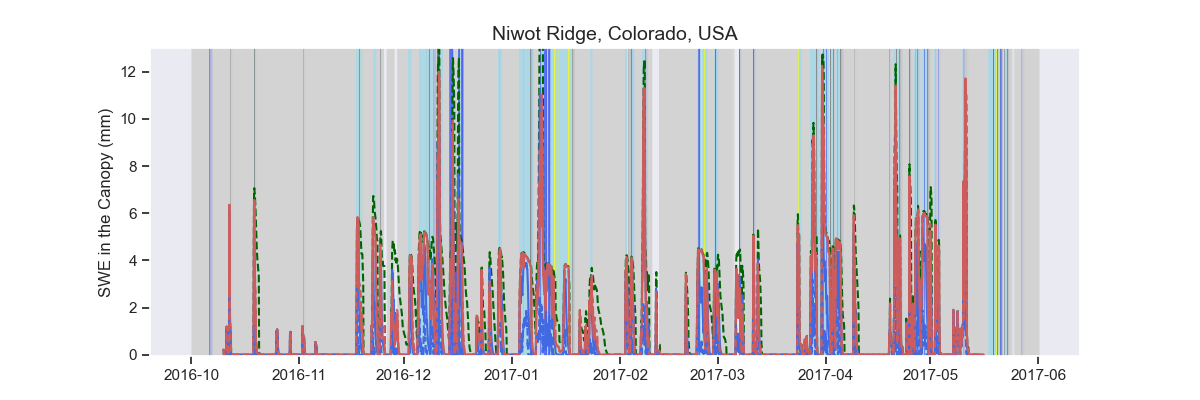

In [12]:
plt.close('all')
niw_melt_cal.scalarCanopyWat_mean.plot(color=colormelt, linestyle='--')
niw_expp_cal.scalarCanopyWat_mean.plot(color=colorexpp)
niw_wind_cal.scalarCanopyWat_mean.plot(color=colorwind)

niw_expp_def.scalarCanopyWat_mean.plot(color=colorexpp, linestyle='--')
niw_wind_def.scalarCanopyWat_mean.plot(color=colorwind, linestyle='--')

# this method requires the dataframe to be indexed by datetime 
obs = niwotobs.copy(deep=True)

for i in range(0, len(obs)):
    if obs.A[i] == 0:
        lines1 = plt.axvspan(obs.datetime[i], obs.datetime[i], 0, 20, color='lightgrey', alpha=0.4, linewidth=1.8)
    
    if obs.A[i] == 1:
        lines2 = plt.axvspan(obs.datetime[i], obs.datetime[i], 0, 20, color='lightblue', alpha=0.9, linewidth=1.8)
    
    if obs.E[i] == 1:
        lines1 = plt.axvspan(obs.datetime[i], obs.datetime[i], 0, 20, color='yellow',    alpha=0.8, linewidth=1.8)
    
    if obs.CD[i] == 0:
        lines1 = plt.axvspan(obs.datetime[i], obs.datetime[i], 0, 20, color='blue',      alpha=0.5, linewidth=1.8)
        

plt.title(nameniwot)
plt.ylabel('SWE in the Canopy (mm)')
plt.xlabel('')

plt.xticks(rotation=0, ha='center')
plt.ylim([-0.05,13])
plt.show()

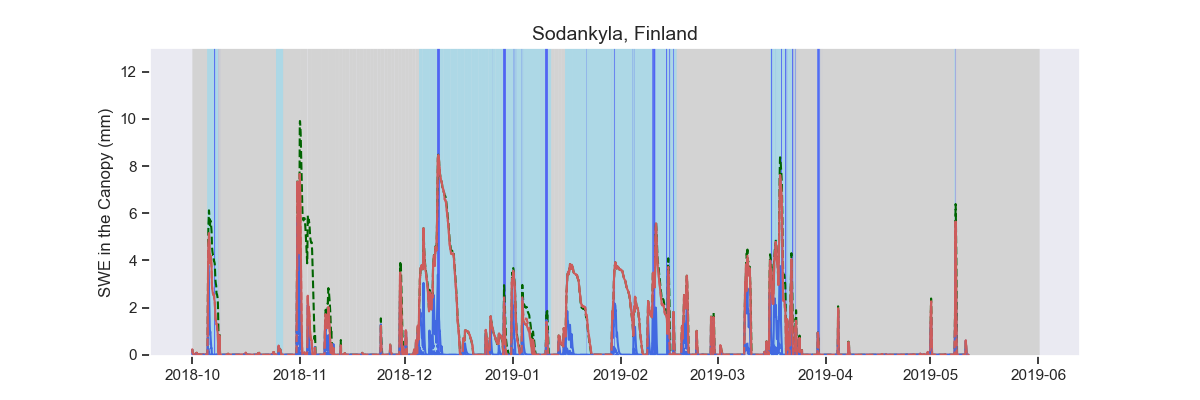

In [65]:
plt.close('all')
sod_melt_cal.scalarCanopyWat_mean.plot(color=colormelt, linestyle='--')
sod_expp_cal.scalarCanopyWat_mean.plot(color=colorexpp)
sod_wind_cal.scalarCanopyWat_mean.plot(color=colorwind)

sod_expp_def.scalarCanopyWat_mean.plot(color=colorexpp, linestyle='--')
sod_wind_def.scalarCanopyWat_mean.plot(color=colorwind, linestyle='--')

# this method requires the dataframe to be indexed by datetime 
obs = sodobs.copy(deep=True)

for i in range(0, len(obs)):
    if obs.A[i] == 0:
        lines1 = plt.axvspan(obs.datetime[i], obs.datetime[i], 0, 20, color='lightgrey', alpha=0.5, linewidth=1.8)
    
    if obs.A[i] == 1:
        lines2 = plt.axvspan(obs.datetime[i], obs.datetime[i], 0, 20, color='lightblue', alpha=0.9, linewidth=1.8)
    
    # if obs.E[i] == 1:
    #     lines1 = plt.axvspan(obs.datetime[i], obs.datetime[i], 0, 20, color='yellow',    alpha=0.5, linewidth=1.8)
    
    if obs.CD[i] == 0:
        lines1 = plt.axvspan(obs.datetime[i], obs.datetime[i], 0, 20, color='blue',      alpha=0.5, linewidth=1.8)
        

plt.title(namesodankyla)
plt.ylabel(nameSWE)
plt.xlabel('')

# # Define the date format
# date_form = DateFormatter("%Y-%M-%D")
# ax.xaxis.set_major_formatter(date_form)

plt.xticks(rotation=0, ha='center')
plt.ylim([-0.05,13])

plt.show()
plt.grid()

In [8]:
soddf = soddf.loc['2018-10-01T00:00:00':'2019-05-11T23:00:00'] # doing this for now because SUMMA is crashing at May 12 so I want to see if this is a quick fix (not a good fix) 

#Melt Cal
sod_melt_cal_1 = sod_melt_cal.scalarCanopyWat_mean.to_dataframe()
sod_melt_cal_1 = sod_melt_cal_1.reset_index(drop=True)

sod_melt_cal_1.index = soddf.index
soddf['melt_cal'] = sod_melt_cal_1.scalarCanopyWat_mean

# Exp Cal
sod_expp_cal_1 = sod_expp_cal.scalarCanopyWat_mean.to_dataframe()
sod_expp_cal_1 = sod_expp_cal_1.reset_index(drop=True)

sod_expp_cal_1.index = soddf.index
soddf['expp_cal'] = sod_expp_cal_1.scalarCanopyWat_mean

# Wind Cal 
sod_wind_cal_1 = sod_wind_cal.scalarCanopyWat_mean.to_dataframe()
sod_wind_cal_1 = sod_wind_cal_1.reset_index(drop=True)

sod_wind_cal_1.index = soddf.index
soddf['wind_cal'] = sod_wind_cal_1.scalarCanopyWat_mean

# Exp Def
sod_expp_def_1 = sod_expp_def.scalarCanopyWat_mean.to_dataframe()
sod_expp_def_1 = sod_expp_def_1.reset_index(drop=True)

sod_expp_def_1.index = soddf.index
soddf['expp_def'] = sod_expp_def_1.scalarCanopyWat_mean

# Wind Def 
sod_wind_def_1 = sod_wind_def.scalarCanopyWat_mean.to_dataframe()
sod_wind_def_1 = sod_wind_def_1.reset_index(drop=True)

sod_wind_def_1.index = soddf.index
soddf['wind_def'] = sod_wind_def_1.scalarCanopyWat_mean

In [152]:
niwotdf = niwotdf.loc['2016-10-10T06:00:00':'2017-05-16T06:00:00'] # doing this for now because SUMMA is crashing at May 12 so I want to see if this is a quick fix (not a good fix) 

#Melt Cal
niw_melt_cal_1 = niw_melt_cal.scalarCanopyWat_mean.to_dataframe()
niw_melt_cal_1 = niw_melt_cal_1.reset_index(drop=True)

niw_melt_cal_1.index = niwotdf.index
niwotdf['melt_cal'] = niw_melt_cal_1.scalarCanopyWat_mean

# Exp Cal
niw_expp_cal_1 = sod_expp_cal.scalarCanopyWat_mean.to_dataframe()
niw_expp_cal_1 = niw_expp_cal_1.reset_index(drop=True)

niw_expp_cal_1.index = niwotdf.index
niwotdf['expp_cal'] = niw_expp_cal_1.scalarCanopyWat_mean

# Wind Cal 
niw_wind_cal_1 = sod_wind_cal.scalarCanopyWat_mean.to_dataframe()
niw_wind_cal_1 = niw_wind_cal_1.reset_index(drop=True)

niw_wind_cal_1.index = niwotdf.index
niwotdf['wind_cal'] = niw_wind_cal_1.scalarCanopyWat_mean

# Exp Def
niw_expp_def_1 = sod_expp_def.scalarCanopyWat_mean.to_dataframe()
niw_expp_def_1 = niw_expp_def_1.reset_index(drop=True)

niw_expp_def_1.index = niwotdf.index
niwotdf['expp_def'] = niw_expp_def_1.scalarCanopyWat_mean

# Wind Def 
niw_wind_def_1 = sod_wind_def.scalarCanopyWat_mean.to_dataframe()
niw_wind_def_1 = niw_wind_def_1.reset_index(drop=True)

niw_wind_def_1.index = niwotdf.index
niwotdf['wind_def'] = niw_wind_def_1.scalarCanopyWat_mean

ValueError: Length mismatch: Expected axis has 5352 elements, new values have 5233 elements

In [9]:
def Shade2(fig, df, variable, level, mode, fillcolor, layer, opacity):
  
    """
    Set a specified color as background for given levels of a specified variable using a shape.
    
    Keyword arguments:
    ==================
    fig -- plotly figure
    variable -- column name in a pandas dataframe
    level -- int or float
    mode -- set threshold above or below
    fillcolor -- any color type that plotly can handle
    layer -- position of shape in plotly fiugre, like "below"
    opacity -- opacity of the fillcolor, WORKING but the ordering matters.. so pay attention to that 
    """
    
    if mode == 'above':
        m = df[variable].gt(level)
    
    if mode == 'below':
        m = df[variable].lt(level)
        
    df1 = df[m].groupby((~m).cumsum())['datetime'].agg(['first','last'])

    for index, row in df1.iterrows():
        # print(row['first'], row['last'])
        fig.add_shape(type="rect", xref="x", yref="paper", x0=row['first'], y0=0, x1=row['last'], y1=1, opacity=opacity, line=dict(color=fillcolor, width=3),fillcolor=fillcolor,layer=layer) 
        fig.add_shape(type="rect", xref="x", yref="paper", x0=row['first'], y0=0, x1=row['last'], y1=1, opacity=opacity, line=dict(color=fillcolor, width=3),fillcolor=fillcolor,layer=layer)
   
    return(fig)

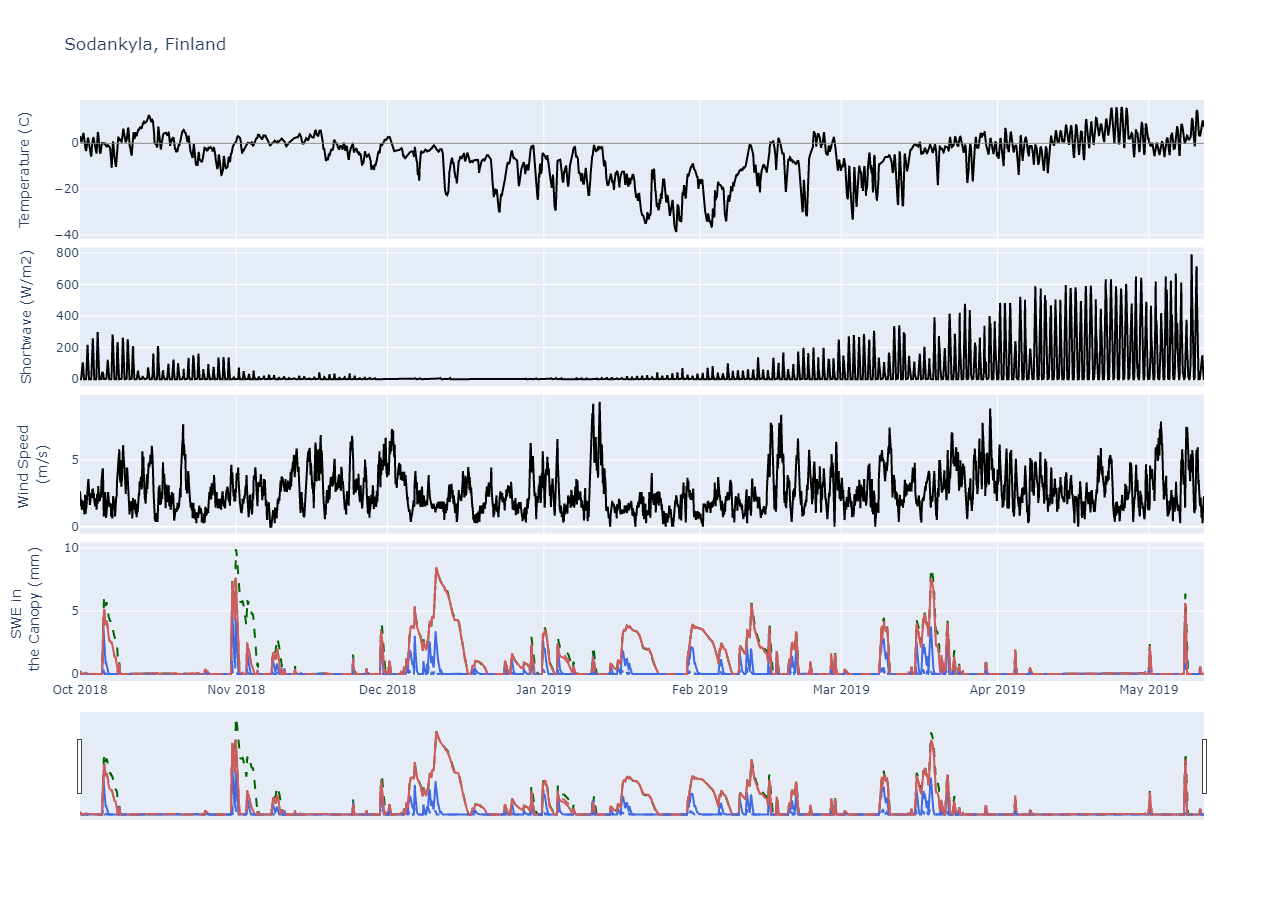

In [10]:
plt.close()

fig = make_subplots(rows=4, cols=1, shared_xaxes=True, vertical_spacing=0.015)

# obs = sodobs.copy(deep=True)

# # # using the shade function
# fig = Shade2(fig = fig, df=obs, variable = 'A', level = .5, mode = 'above', fillcolor = colorsnow,      layer = 'below', opacity=0.5) # if snow, lightblue
# fig = Shade2(fig = fig, df=obs, variable = 'A', level = .5, mode = 'below', fillcolor = colornosnow,    layer = 'below', opacity=0.5) # if no snow, grey
# fig = Shade2(fig = fig, df=obs, variable = 'E', level = .5, mode = 'above', fillcolor = colorsunny,     layer = 'below', opacity=0.5) # if sun, yellow
# fig = Shade2(fig = fig, df=obs, variable = 'CD',level = .5, mode = 'below', fillcolor = colorsnowunload,layer = 'below', opacity=0.3) # if unloading, blue

fig.add_trace(go.Scatter(x = soddf.index, y = soddf['temp'], line_color=colormet, showlegend=False),row=1, col=1)
fig.add_hline(y=0, line_color='grey', line_width=1, row=1, col=1) # plotly add hline instead of zeros 

fig.add_trace(go.Scatter(x = soddf.index, y = soddf['shortwave'], line_color=colormet, showlegend=False),row=2, col=1)
fig.add_trace(go.Scatter(x = soddf.index, y = soddf['windspeed'], line_color=colormet, showlegend=False),row=3, col=1)

fig.add_trace(go.Scatter(x = soddf.index, y = soddf['melt_cal'], line=dict(color=colormelt, dash='dash', width=2), showlegend=False),row=4, col=1)
fig.add_trace(go.Scatter(x = soddf.index, y = soddf['expp_cal'], line=dict(color=colorexpp,              width=2), showlegend=False),row=4, col=1)
fig.add_trace(go.Scatter(x = soddf.index, y = soddf['wind_cal'], line=dict(color=colorwind,              width=2), showlegend=False),row=4, col=1)

fig.add_trace(go.Scatter(x = soddf.index, y = soddf['expp_def'], line=dict(color=colorexpp, dash='dash', width=2), showlegend=False),row=4, col=1)
fig.add_trace(go.Scatter(x = soddf.index, y = soddf['wind_def'], line=dict(color=colorwind, dash='dash', width=2), showlegend=False),row=4, col=1)


fig.update_yaxes(title_text='Temperature (C)', row=1, col=1)
fig.update_yaxes(title_text=nameSW, row=2, col=1)
fig.update_yaxes(title_text=namewindbreak, row=3, col=1)
fig.update_yaxes(title_text=nameSWEbreak, row=4, col=1)


fig.update_xaxes(title_text='', row=1, col=1)
fig.update_layout(height=900, width=1200, title_text=namesodankyla)

fig.update_xaxes(rangeslider_visible=True, row=4, col=1) # currently set to be under row5, but can prob figure out a better way for subplots if I want it

fig.show()

In [ ]:
plt.close()

fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=0.02)

obs = niwotobs.copy(deep=True)

# # using the shade function
# fig = Shade2(fig = fig, df=obs, variable = 'A', level = .5, mode = 'above', fillcolor = colorsnow,      layer = 'below', opacity=0.5) # if snow, lightblue
# fig = Shade2(fig = fig, df=obs, variable = 'A', level = .5, mode = 'below', fillcolor = colornosnow,    layer = 'below', opacity=0.5) # if no snow, grey
# fig = Shade2(fig = fig, df=obs, variable = 'E', level = .5, mode = 'above', fillcolor = colorsunny,     layer = 'below', opacity=0.5) # if sun, yellow
# fig = Shade2(fig = fig, df=obs, variable = 'CD',level = .5, mode = 'below', fillcolor = colorsnowunload,layer = 'below', opacity=0.3) # if unloading, blue

fig.add_trace(go.Scatter(x = niwotflux['datetime'], y = niwotflux['temp'], line_color=colorstation1, showlegend=False),row=1, col=1)
fig.add_hline(y=0, line_color='grey', line_width=1, row=1, col=1) # plotly add hline instead of zeros 

fig.add_trace(go.Scatter(x = niwotflux['datetime'], y = niwotflux['shortwave'], line_color=colorstation1, showlegend=False),row=2, col=1)
fig.add_trace(go.Scatter(x = niwotflux['datetime'], y = niwotflux['windspeed'], line_color=colorstation1, showlegend=False),row=3, col=1)


fig.update_yaxes(title_text=nametemp, row=1, col=1)
fig.update_yaxes(title_text=nameSW, row=2, col=1)
fig.update_yaxes(title_text=namewind, row=3, col=1)

fig.update_xaxes(title_text='', row=1, col=1)
fig.update_layout(height=800, width=1200, title_text="Niwot Ridge, Colorado, USA")

fig.update_xaxes(rangeslider_visible=True, row=3, col=1) # currently set to be under row5, but can prob figure out a better way for subplots if I want it

fig.show()

## Snow Depth 

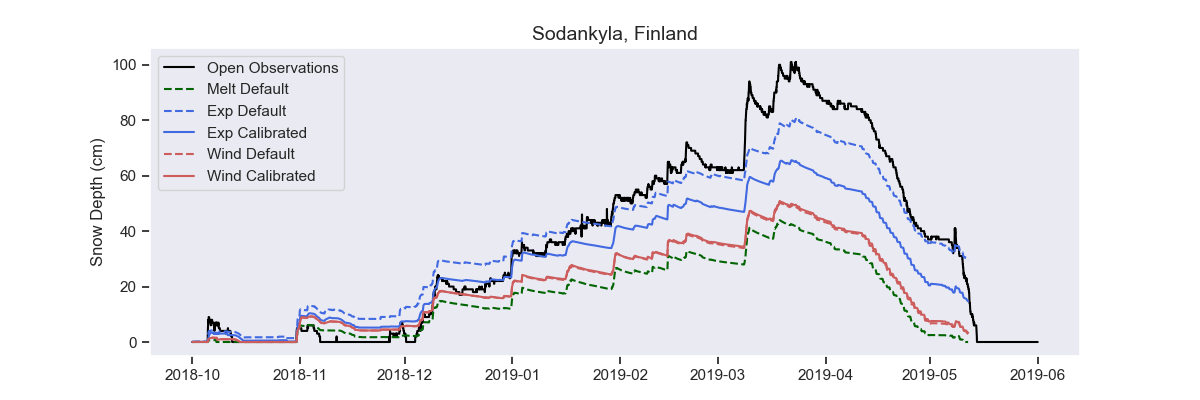

In [48]:
plt.close('all')
soddfx.snowdepth.plot(color=colormet)

((sod_melt_cal.scalarSnowDepth_mean)*100).plot(color=colormelt, linestyle='--')
((sod_expp_def.scalarSnowDepth_mean)*100).plot(color=colorexpp, linestyle='--')
((sod_expp_cal.scalarSnowDepth_mean)*100).plot(color=colorexpp)

((sod_wind_def.scalarSnowDepth_mean)*100).plot(color=colorwind, linestyle='--')
((sod_wind_cal.scalarSnowDepth_mean)*100).plot(color=colorwind)


plt.title(namesodankyla)
plt.ylabel('Snow Depth (cm)')
plt.xlabel('')

# # Define the date format
# date_form = DateFormatter("%Y-%M-%D")
# ax.xaxis.set_major_formatter(date_form)

plt.xticks(rotation=0, ha='center')
# plt.ylim([-0.05,13])
plt.legend(['Open Observations','Melt Default','Exp Default', 'Exp Calibrated', 'Wind Default', 'Wind Calibrated'])

plt.show()
plt.grid()

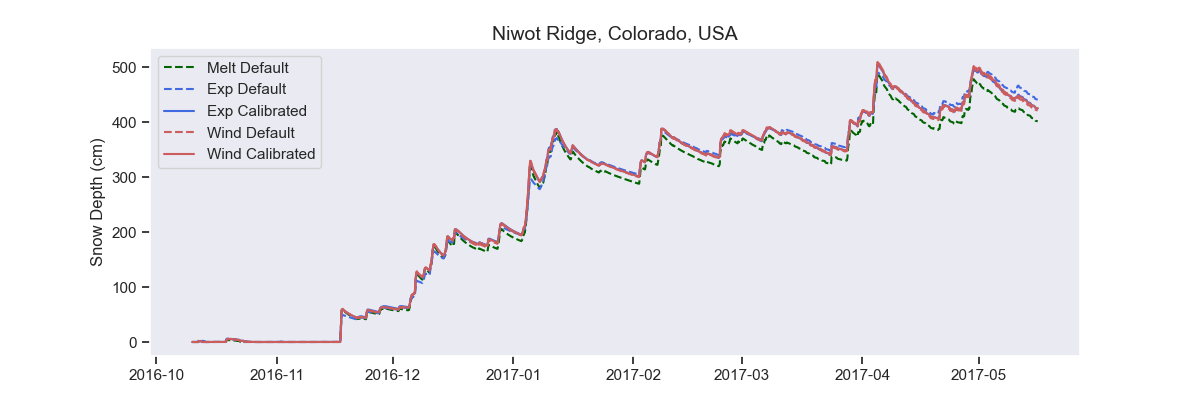

In [47]:
plt.close('all')

# soddfx.snowdepth.plot(color=colormet)

((niw_melt_cal.scalarSnowDepth_mean)*100).plot(color=colormelt, linestyle='--')
((niw_expp_def.scalarSnowDepth_mean)*100).plot(color=colorexpp, linestyle='--')
((niw_expp_cal.scalarSnowDepth_mean)*100).plot(color=colorexpp)

((niw_wind_def.scalarSnowDepth_mean)*100).plot(color=colorwind, linestyle='--')
((niw_wind_cal.scalarSnowDepth_mean)*100).plot(color=colorwind)


plt.title(nameniwot)
plt.ylabel('Snow Depth (cm)')
plt.xlabel('')

# # Define the date format
# date_form = DateFormatter("%Y-%M-%D")
# ax.xaxis.set_major_formatter(date_form)

plt.xticks(rotation=0, ha='center')
# plt.ylim([-0.05,13])
# plt.legend(['Observations','Melt Default','Exp Default', 'Exp Calibrated', 'Wind Default', 'Wind Calibrated'])
plt.legend(['Melt Default','Exp Default', 'Exp Calibrated', 'Wind Default', 'Wind Calibrated'])


plt.show()
plt.grid()